<center>
    <img src="https://s3-api.us-geo.objectstorAGE.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo">
</center>


## Data Description
·      CRIM - per capita crime rate by town

·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

·      INDUS - proportion of non-retail business acres per town.

·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

·      NOX - nitric oxides concentration (parts per 10 million)

·      RM - averAGE number of rooms per dwelling

·      AGE - proportion of owner-occupied units built prior to 1940

·      DIS - weighted distances to five Boston employment centres

·      RAD - index of accessibility to radial highways

·      TAX - full-value property-tax rate per $10,000

·      PTRATIO - pupil-teacher ratio by town

·      LSTAT - % lower status of the population

·      MEDV - Median value of owner-occupied homes in $1000's

#### Import the required libraries we need for the lab.


In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [3]:
boston_df=pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storAGE.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv')

#### Add your code below following the instructions given in the course to complete the peer graded assignment


## Task 1: Data Familiarization

In [25]:
boston_df.head()
# boston_df.drop(columns = 'Unnamed: 0', inplace=True)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [11]:
boston_df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'LSTAT', 'MEDV'],
      dtype='object')

In [12]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [13]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


## Task 2: Generate Basic Statistics and Visualizations for Upper ManAGEment

### Median value of owner-occupied homes

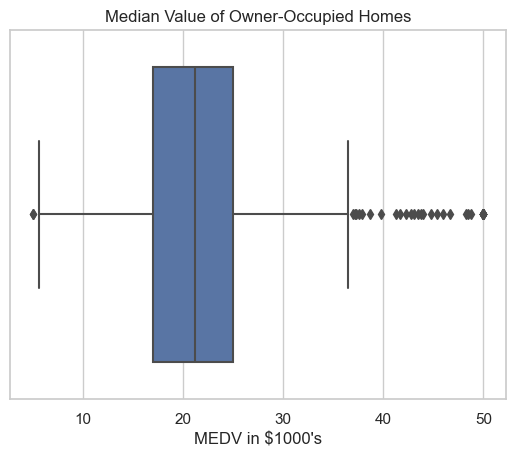

In [33]:
ax = sns.boxplot(x='MEDV', data=boston_df)
plot.title('Median Value of Owner-Occupied Homes')
plot.xlabel("MEDV in $1000's")
plot.show()

### Charles River

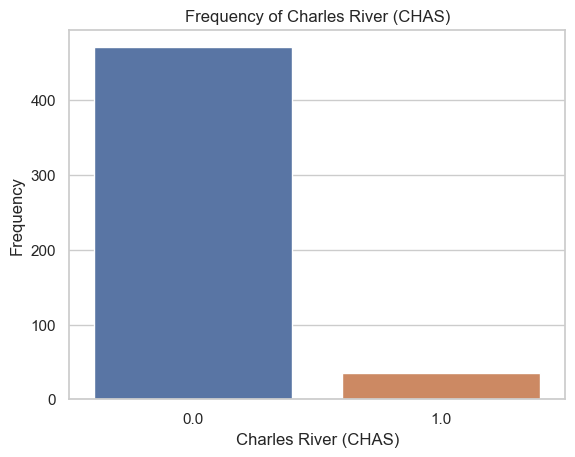

In [34]:
plot.ylabel('Frequency')
plot.title('Frequency of Charles River (CHAS)')
sns.countplot(x='CHAS', data=boston_df)

plot.xlabel('Charles River (CHAS)')
plot.ylabel('Frequency')
plot.title('Frequency of Charles River (CHAS)')

plot.show()

### Boxplot for the MEDC variable vs the AGE variable

In [58]:
boston_df.loc[(boston_df['AGE'] <= 35), 'AGE_GRP'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'AGE_GRP'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'AGE_GRP'] = '70 years and older'

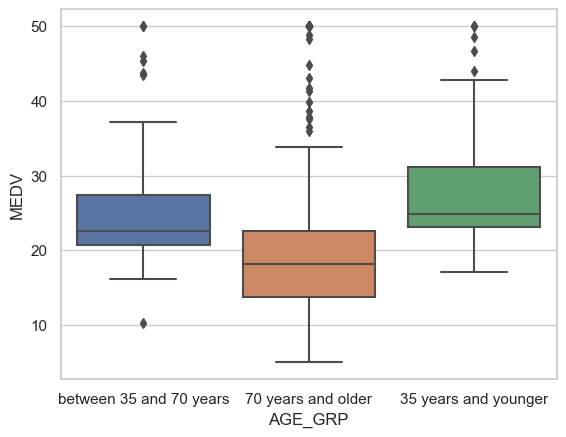

In [60]:
ax = sns.boxplot(x='AGE_GRP', y='MEDV', data=boston_df)

 ### Scatter Plot

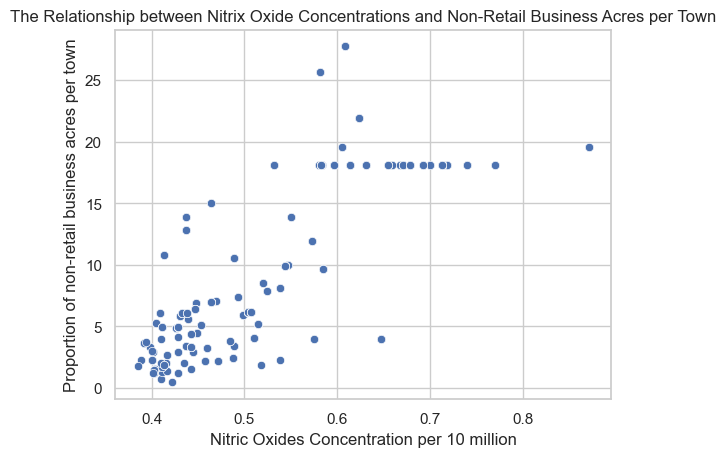

In [54]:
ax = sns.scatterplot(x='NOX', y='INDUS', data=boston_df)
plot.title('The Relationship between Nitrix Oxide Concentrations and Non-Retail Business Acres per Town')
plot.xlabel('Nitric Oxide Concentration per 10 million')
plot.ylabel('Proportion of non-retail business acres per town')
plot.show()

The scatterplot indicates a positive relationship between Nitric Oxide and business acres per town

### Histogram 

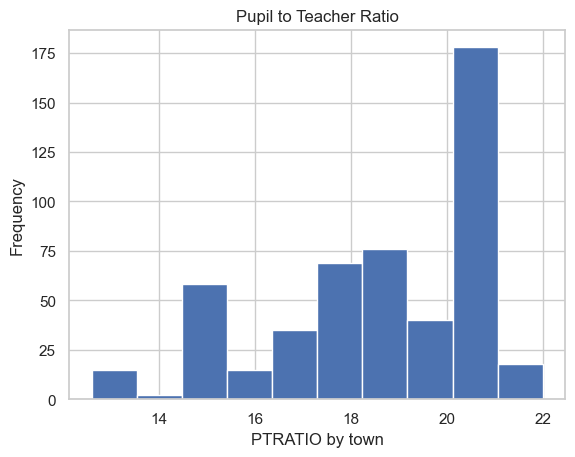

In [50]:
plot.hist(boston_df['PTRATIO'])
plot.title('Pupil to Teacher Ratio')
plot.xlabel('PTRATIO by town')
plot.ylabel('Frequency')
plot.show()

## Task 3: Use the appropriate tests

### Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

In [55]:
scipy.stats.levene(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1]['MEDV'], center='mean')

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

### Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

### Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

In [64]:
cont_table  = pd.crosstab(boston_df['NOX'], boston_df['INDUS'])
cont_table

INDUS,0.46,0.74,1.21,1.22,1.25,1.32,1.38,1.47,1.52,1.69,...,11.93,12.83,13.89,13.92,15.04,18.10,19.58,21.89,25.65,27.74
NOX,,,,,,,,,,,,,,,,,,,,,
0.385,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0.389,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0.392,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0.394,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0.398,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.713,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,18,0,0,0,0
0.718,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,6,0,0,0,0
0.740,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,13,0,0,0,0


### What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

In [67]:
from statsmodels.formula.api import ols
lm = ols('DIS ~ INDUS', data = boston_df).fit()
table= sm.stats.anova_lm(lm)
print(table)

             df       sum_sq      mean_sq           F        PR(>F)
INDUS       1.0  1122.504717  1122.504717  506.632124  3.586280e-78
Residual  504.0  1116.672927     2.215621         NaN           NaN
